In [69]:
import torch
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import os
from PIL import Image

In [56]:
matData = loadmat("../data/raw/cars_annos.mat")
matData

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 28 19:34:55 2015',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         ...,
         (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dt

In [57]:
matData['annotations'][0][0][0][0]

np.str_('car_ims/000001.jpg')

In [58]:
# convert matlab dataset to pandas
# hstack() : flattens dataset into 1-dimension
car_data = pd.DataFrame(np.hstack((matData['annotations'], matData['class_names'])))
car_data

,0,1,2,3,4,5,6,7,8,9,...,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380
0,"([car_ims/000001.jpg], [[112]], [[7]], [[853]]...","([car_ims/000002.jpg], [[48]], [[24]], [[441]]...","([car_ims/000003.jpg], [[7]], [[4]], [[277]], ...","([car_ims/000004.jpg], [[33]], [[50]], [[197]]...","([car_ims/000005.jpg], [[5]], [[8]], [[83]], [...","([car_ims/000006.jpg], [[10]], [[6]], [[250]],...","([car_ims/000007.jpg], [[56]], [[1]], [[394]],...","([car_ims/000008.jpg], [[1]], [[13]], [[113]],...","([car_ims/000009.jpg], [[15]], [[111]], [[271]...","([car_ims/000010.jpg], [[14]], [[18]], [[148]]...",...,[Toyota Camry Sedan 2012],[Toyota Corolla Sedan 2012],[Toyota 4Runner SUV 2012],[Volkswagen Golf Hatchback 2012],[Volkswagen Golf Hatchback 1991],[Volkswagen Beetle Hatchback 2012],[Volvo C30 Hatchback 2012],[Volvo 240 Sedan 1993],[Volvo XC90 SUV 2007],[smart fortwo Convertible 2012]


In [59]:
# extract annotations
annotations = matData['annotations']
class_names = matData['class_names']
annotations

array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        ...,
        (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
        (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([

In [60]:
class_names = [str(c[0]) for c in class_names[0]] # class_names : '2011 Audi A4'
image_names = [str(a[0][0].replace('car_ims/', '')) for a in annotations[0]] # image_names : '00001.jpg'
image_names = [name[1:] if name.startswith('0') else name for name in image_names] # fixes extra leading 0
class_labels = [a[5][0][0] for a in annotations[0]] # class_labels : '1,2,3,...,n'

In [61]:
# create dataframe
data = {
    'file_name': image_names,
    'class_label': class_labels,
    'class_name': [class_names[label - 1] for label in class_labels]
}

df = pd.DataFrame(data)

In [79]:
df

,file_name,class_label,class_name
0,00001.jpg,1,AM General Hummer SUV 2000
1,00002.jpg,1,AM General Hummer SUV 2000
2,00003.jpg,1,AM General Hummer SUV 2000
3,00004.jpg,1,AM General Hummer SUV 2000
4,00005.jpg,1,AM General Hummer SUV 2000
...,...,...,...
16180,16181.jpg,196,smart fortwo Convertible 2012
16181,16182.jpg,196,smart fortwo Convertible 2012
16182,16183.jpg,196,smart fortwo Convertible 2012
16183,16184.jpg,196,smart fortwo Convertible 2012


In [73]:
# Check if '00001.jpg' is in the 'file_name' column
image_file_name = df.iloc[0]['file_name']
is_in_dataframe = image_file_name in df['file_name'].values

print(f"Is '{image_file_name}' in the DataFrame? {is_in_dataframe}")

Is '00001.jpg' in the DataFrame? True


In [90]:
image_directory = '../data/raw/images/'
first_img = os.path.join(image_directory, df.iloc[8144]['file_name'])

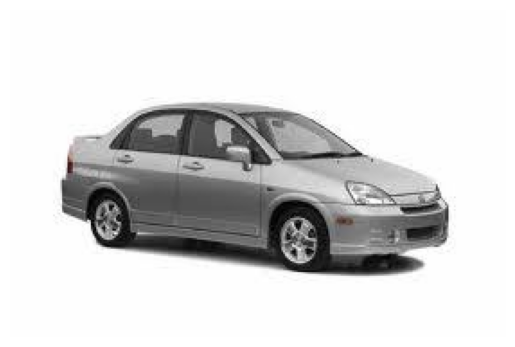

In [91]:
image = Image.open(first_img)
plt.imshow(image)
plt.axis('off')
plt.show()

In [105]:
# transform dataframe images into target size and normalizes pixels within range [0,1]
def load_and_normalize_image(file_path, target_shape):
    # load the image
    img = Image.open(file_path)
    # Resize image
    img = img.resize(target_shape)
    # convert to np array
    img_array = np.array(img)
    img_array = img_array / 255
    return img_array


def create_dataset(image_directory, target_shape):
    dataset = []
    for filename in os.listdir(image_directory):
        file_path = os.path.join(image_directory, filename)
        img_array = load_and_normalize_image(file_path, target_shape)
        dataset.append(img_array)
    return np.array(dataset)

In [106]:
image_dataset = create_dataset(image_directory='../data/raw/images/', target_shape=(256,256))

# Print shape of the dataset
print("Shape of the image dataset:", image_dataset.shape)

MemoryError: Unable to allocate 1.50 MiB for an array with shape (256, 256, 3) and data type float64